In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

SyntaxError: unterminated string literal (detected at line 15) (950724824.py, line 15)

In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['proportion_best_seller'] = crosstab[True] / (crosstab[True] + crosstab[False])

sorted_crosstab = crosstab.sort_values(by='proportion_best_seller', ascending=False)

print(sorted_crosstab[['proportion_best_seller']])

isBestSeller                    proportion_best_seller
category                                              
Grocery                                       0.058135
Smart Home Security & Lighting                0.057692
Health & Personal Care                        0.057686
Mobile Phone Accessories                      0.042471
Power & Hand Tools                            0.035339
...                                                ...
Bedding Collections                           0.000000
CPUs                                          0.000000
CD, Disc & Tape Players                       0.000000
Blank Media Cases & Wallets                   0.000000
eBook Readers & Accessories                   0.000000

[296 rows x 1 columns]


In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value


(np.float64(36540.20270061387), np.float64(0.0))

In [7]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

In [10]:
crosstab_result.plot(kind="bar", stacked=True);


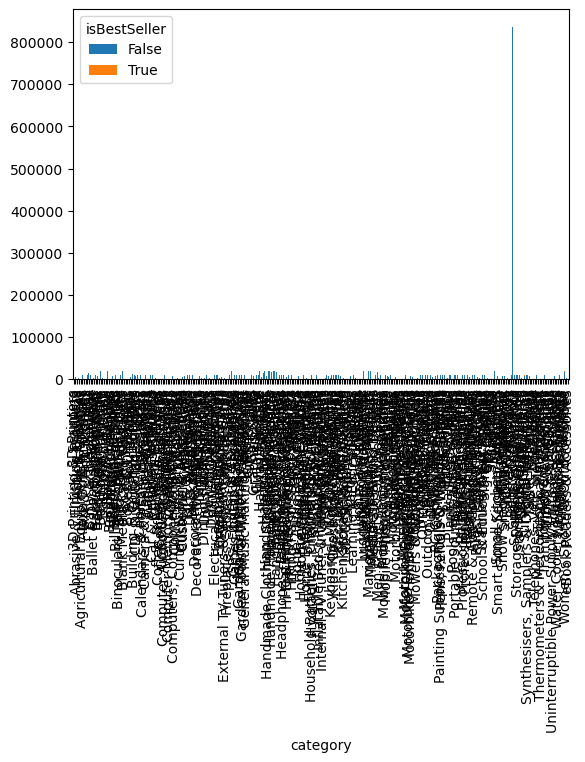

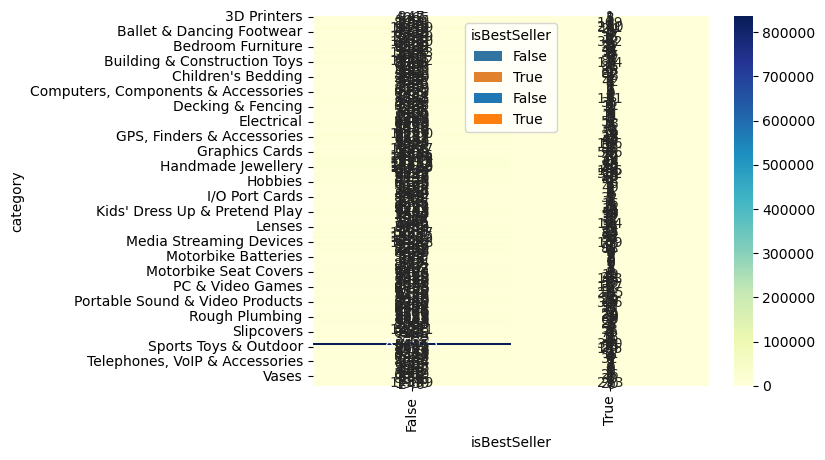

In [11]:
import matplotlib.pyplot as plt

# Create a stacked bar chart from the crosstab result
crosstab_result.plot(kind="bar", stacked=True)

# Create a count plot showing category distribution with isBestSeller as the hue
sns.countplot(data=df, y='category', hue='isBestSeller')

# Create a heatmap with a valid colormap
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")

# Display all plots
plt.show()

In [8]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

SyntaxError: unterminated string literal (detected at line 13) (3615387901.py, line 13)

In [12]:
# Calculate IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

print(f"Removed {len(df) - len(df_no_outliers)} price outliers")


Removed 327688 price outliers


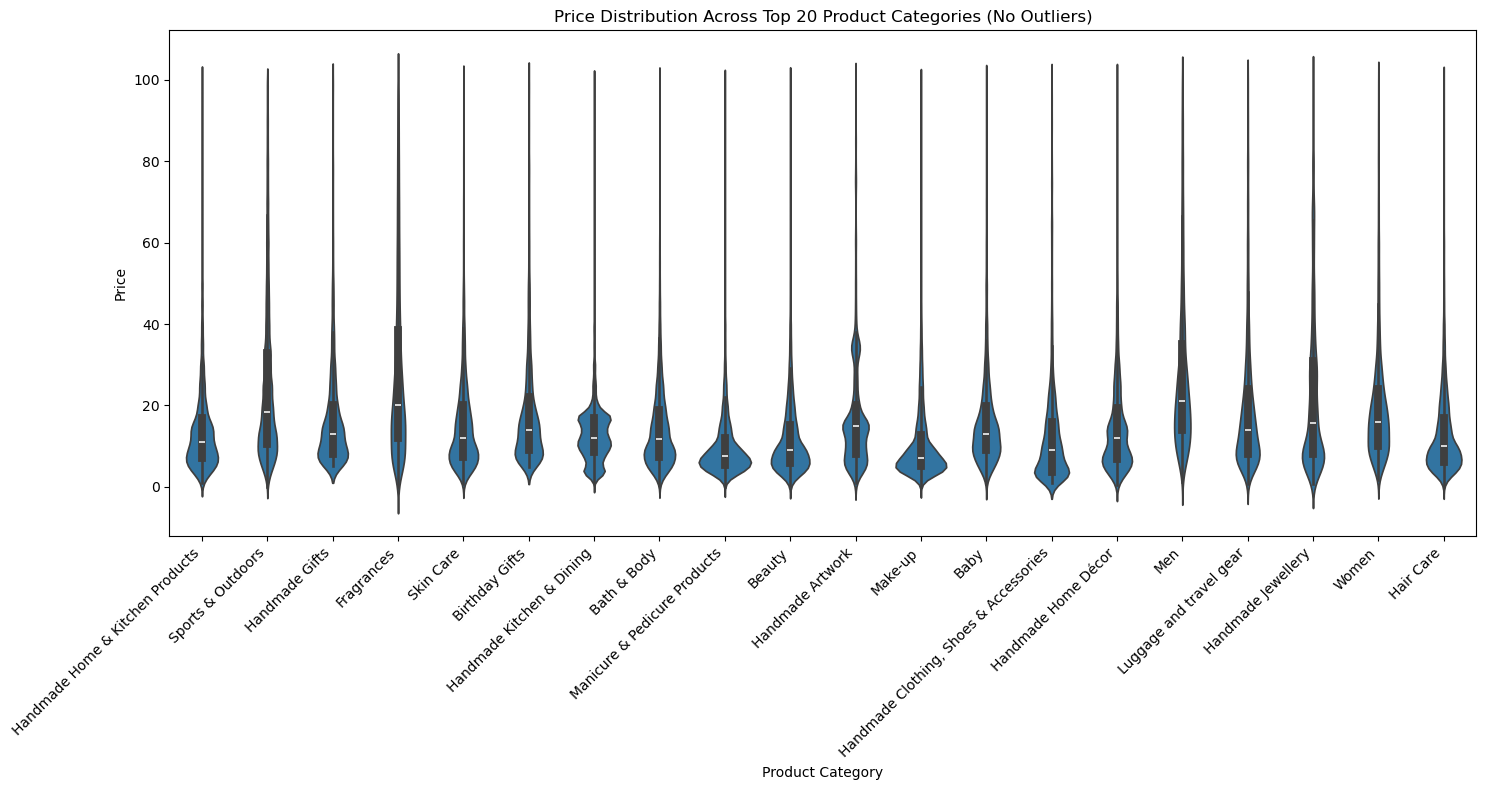

Top 5 Categories by Median Price:
 category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(15, 8))
sns.violinplot(data=df_top_20, x='category', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Product Categories (No Outliers)')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Find category with highest median price (no filter)
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print("Top 5 Categories by Median Price:\n", median_prices.head())


/var/folders/j0/mq_mr2hj0hl8xv4kfq895gk40000gn/T/ipykernel_8255/3038757907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')


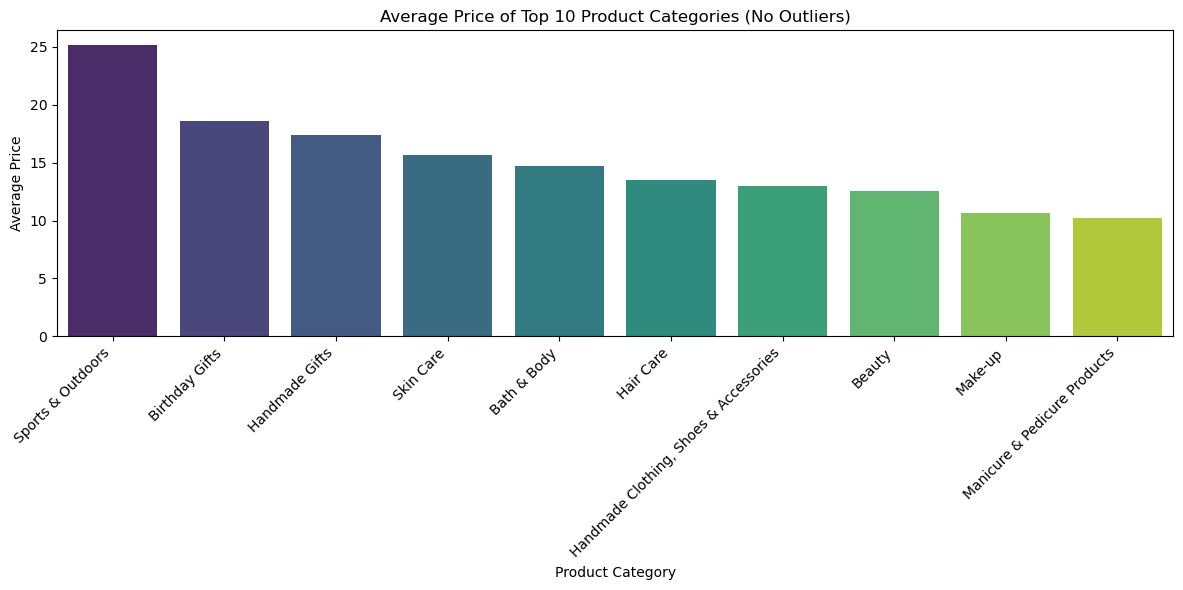

Top 5 Categories by Average Price:
 category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64


In [14]:
# Get top 10 categories by count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Compute average prices
avg_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price of Top 10 Product Categories (No Outliers)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Highest average price overall (no filter)
overall_avg_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print("Top 5 Categories by Average Price:\n", overall_avg_prices.head())


In [ ]:
### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [15]:
from scipy import stats

# Mean, Median, Mode
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating


(np.float64(2.152836472966065), 0.0, np.float64(0.0))

In [17]:
# Variance, Standard Deviation, IQR
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
variance_rating, std_dev_rating, iqr_rating

(4.81743402976196, 2.1948653785054697, np.float64(4.4))

In [19]:
# Skewness and Kurtosis
skewness = df['stars'].skew()
kurtosis = df['stars'].kurt()
skewness, kurtosis

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

<Figure size 800x500 with 0 Axes>

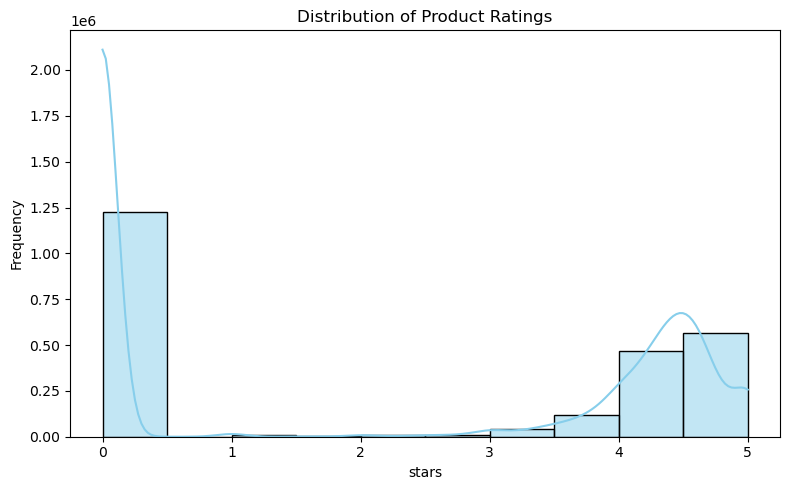

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['stars'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.xticks(range(int(df['stars'].min()), int(df['stars'].max())+1))
plt.tight_layout()
plt.show()
